In [1]:
!pip install pandas openpyxl

In [33]:
from google.colab import files
uploaded = files.upload()

Saving social_media_comments.csv to social_media_comments (1).csv


In [34]:
import pandas as pd

# Excel dosyasını okuyalım
df = pd.read_csv('social_media_comments.csv', encoding='ISO-8859-9')

df

,Tip,Paylaşım
0,Negatif,doğa ağzımıza sıçsa hakkı var
1,Pozitif,anne bir sanatçıdır güzel eseri yavrusudur
2,Negatif,ibrahimin oğlunu koruyan tanrı ben sokayım
3,Negatif,köpeğim suratına sıçsın senin namussuz karı
4,Negatif,ben söğüşledim birazda sen söğüşle
...,...,...
11114,Pozitif,bugün hava güzel
11115,Pozitif,allah akıl fikir versin
11116,Negatif,allah belanı versin
11117,Pozitif,allah akıl fikir versin sana


# DATA ANALYSIS AND DATA PREPROCESS

In [30]:
df.describe()

,Yorum_Uzunlugu
count,11117.000000
mean,10.085005
std,7.305784
min,1.000000
25%,5.000000
50%,8.000000
75%,13.000000
max,61.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11119 entries, 0 to 11118
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tip       11119 non-null  object
 1   Paylaşım  11117 non-null  object
dtypes: object(2)
memory usage: 173.9+ KB


In [ ]:
df.isnull().sum()

,0
Tip,0
Paylaşım,2


In [35]:
# Check and clean up missing data
df.dropna(subset=["Paylaşım"], inplace=True)

# Edit column names
df.rename(columns={"Paylaşım": "Comment", "Tip": "Sentiment"}, inplace=True)

df.isnull().sum()

,0
Sentiment,0
Comment,0


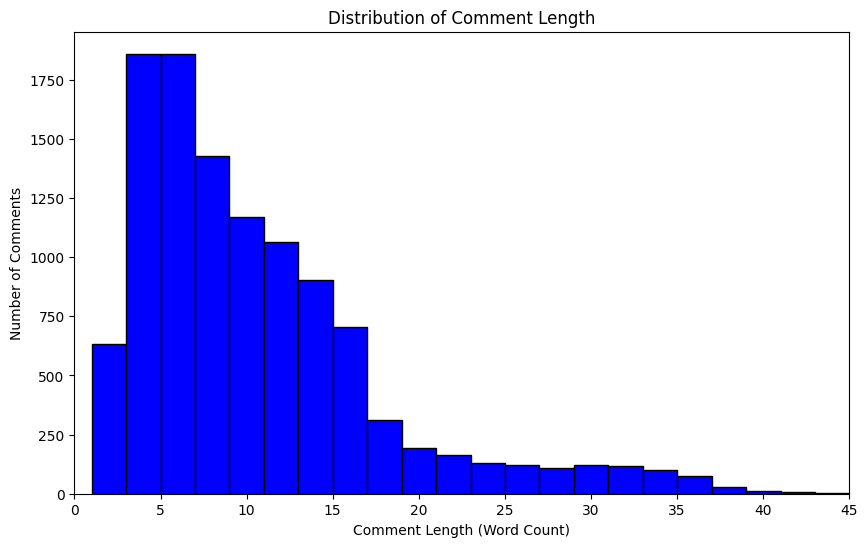

In [36]:
import matplotlib.pyplot as plt

# Calculate comment lengths
df["Comment_Length"] = df["Comment"].astype(str).apply(lambda x: len(x.split()))

# Draw histogram
plt.figure(figsize=(10, 6))
plt.hist(df["Comment_Length"], bins=30, edgecolor='black', color='blue')
plt.xlabel("Comment Length (Word Count)")
plt.ylabel("Number of Comments")
plt.title("Distribution of Comment Length")
plt.xlim(0, 45)
plt.show()


StopWord ve Lemmatization

In [37]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [38]:
!pip install stanza

In [39]:
# Custom Turkish stopword list
custom_stopwords = {
    "bir", "bi", "ben", "sen", "biz", "siz", "o", "bu", "şu", "onlar",
    "mı", "mi", "mu", "mü", "var", "yok", "değil", "kadar",
    "gibi", "çok", "böyle", "olsun", "ile", "ve", "ama", "fakat",
    "ki", "da", "de", "şey", "bazı", "hep", "hiç", "neden", "nasıl", "senin", "benim", "sizin"
}


In [40]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK data
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')  # Support package for WordNet in other languages

# Define stopwords and lemmatizer
stop_words = set(stopwords.words('turkish'))  # Turkish stopwords set
lemmatizer = WordNetLemmatizer()

# Stopword removal function
def remove_stopwords(comment):
    words = comment.split()
    cleaned_comment = " ".join([word for word in words if word not in custom_stopwords])
    return cleaned_comment

# Text preprocessing function
def preprocess_text(text):
    text = re.sub(r'[^a-zA-ZçğıöşüÇĞİÖŞÜ\s]', ' ', text)  # Remove non-letter and non-space characters
    text = text.lower().strip()  # Convert to lowercase and strip leading/trailing spaces

    # Lemmatization and stopword removal
    text = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    text = ' '.join(text)

    return text

# Apply to DataFrame
df['Lemmatized_Comment'] = df['Comment'].astype(str).apply(preprocess_text)

df["Clean_Comment"] = df["Lemmatized_Comment"].apply(remove_stopwords)

# Show first 5 cleaned comments
print(df["Clean_Comment"].head())


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0                 doğa ağzımıza sıçsa hakkı
1    anne sanatçıdır güzel eseri yavrusudur
2    ibrahimin oğlunu koruyan tanrı sokayım
3     köpeğim suratına sıçsın namussuz karı
4                söğüşledim birazda söğüşle
Name: Clean_Comment, dtype: object


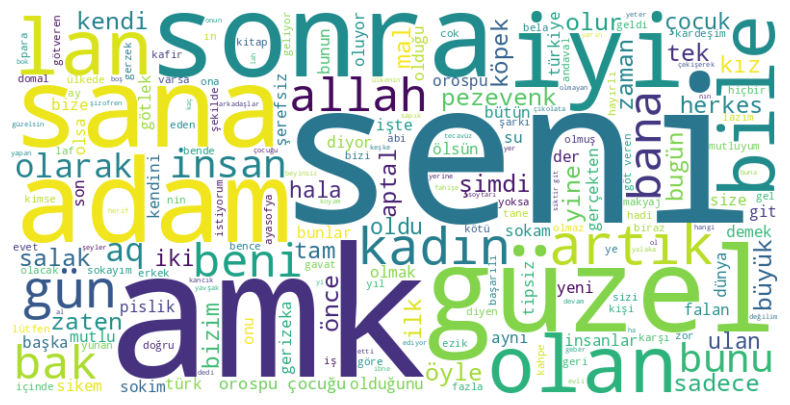

In [41]:
# To show the frequent usage of words in the 'Comment' column:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert all elements in 'Clean_Comment' column to strings before joining
text = " ".join(str(review) for review in df["Clean_Comment"])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


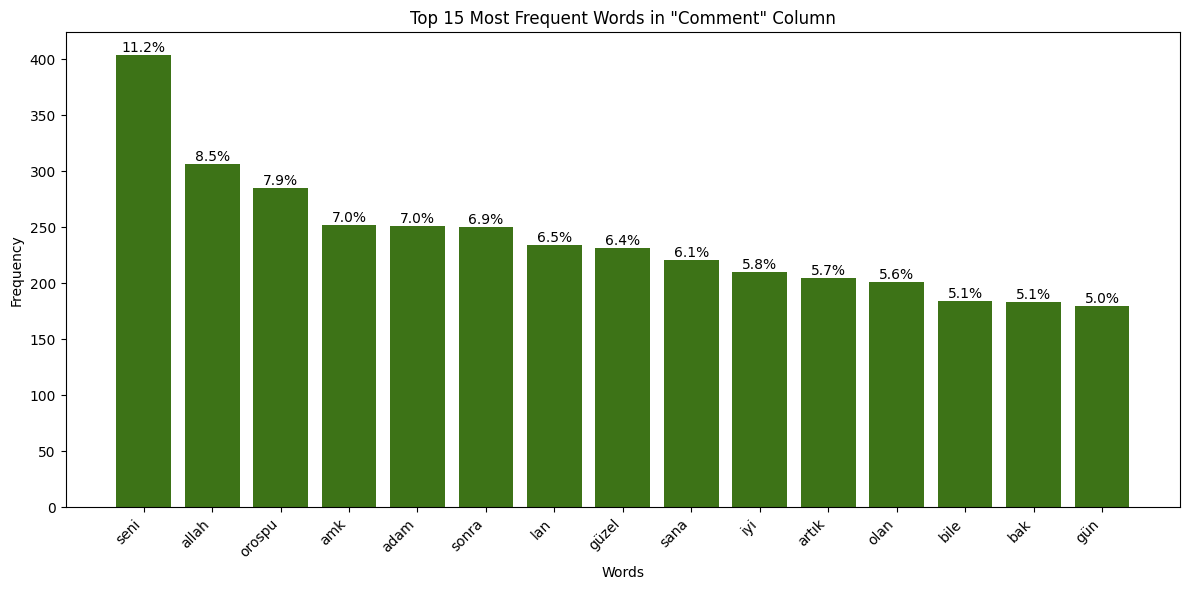

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# 1. Combine all text from the 'Comment' column
all_text = " ".join(str(review) for review in df["Clean_Comment"])

# 2. Split the text into words and count their frequency
word_counts = Counter(all_text.split())

# 3. Get the 15 most common words
top_15_words = word_counts.most_common(15)

# 4. Separate words and frequencies for plotting
words = [word[0] for word in top_15_words]
frequencies = [word[1] for word in top_15_words]

# 5. Calculate percentage for each word
total_words = sum(frequencies)
percentages = [(freq / total_words) * 100 for freq in frequencies]

# 6. Create the bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(words, frequencies, color='#3D7317')
plt.title('Top 15 Most Frequent Words in "Comment" Column')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# 7. Add percentage labels above each bar
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


<ipython-input-45-53cadc443589>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='Comment_Length', data=df, palette="Set2")


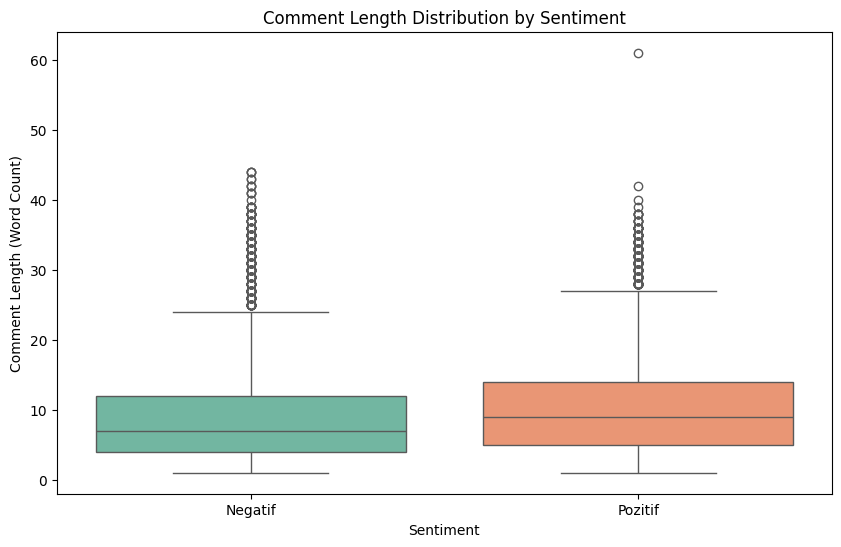

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Create the box plot
sns.boxplot(x='Sentiment', y='Comment_Length', data=df, palette="Set2")

plt.title('Comment Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Comment Length (Word Count)')
plt.show()

Total number of comments: 11117
Number of positive comments: 0
Number of negative comments: 0


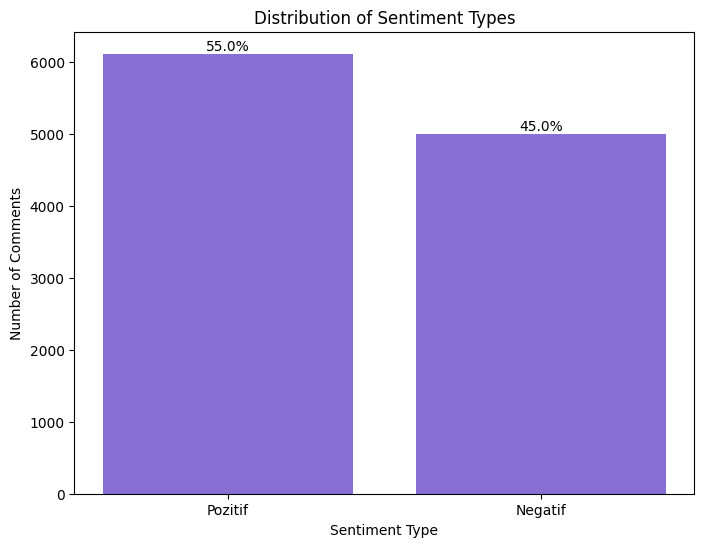

In [44]:
import matplotlib.pyplot as plt

print(f"Total number of comments: {len(df)}")
print(f"Number of positive comments: {len(df[df['Sentiment'] == 'Positive'])}")
print(f"Number of negative comments: {len(df[df['Sentiment'] == 'Negative'])}")

type_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(8, 6))
bars = plt.bar(type_counts.index, type_counts.values, color= "#876FD4")
plt.title('Distribution of Sentiment Types')
plt.xlabel('Sentiment Type')
plt.ylabel('Number of Comments')

# Add percentage labels
total = len(df['Sentiment'])  # Total number of comments
for bar in bars:
    height = bar.get_height()
    percentage = (height / total) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()


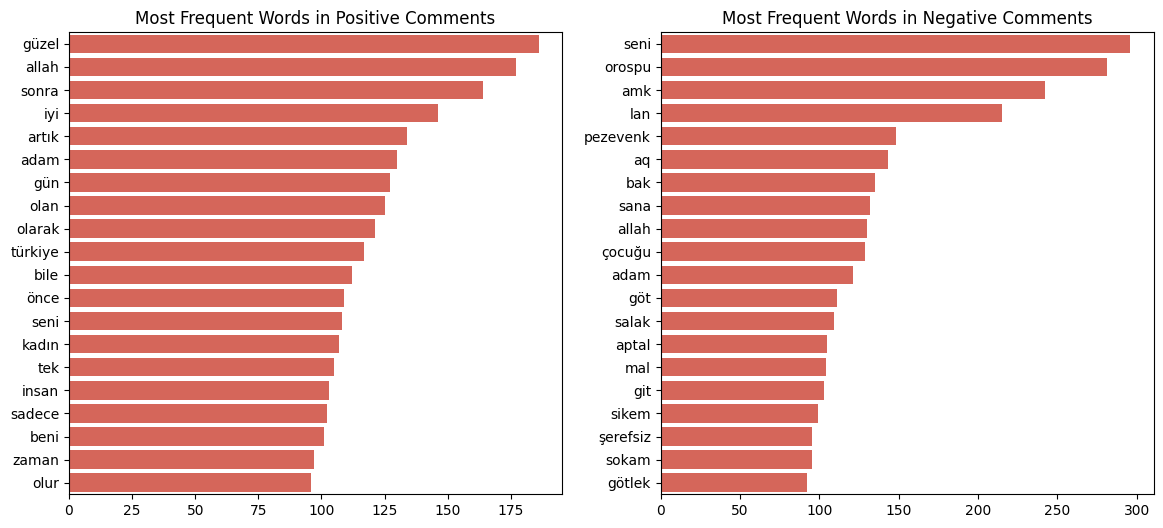

In [46]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Clean the comments (lowercase, punctuation etc.)
df["Cleaned_Comment_Text"] = df["Clean_Comment"].str.lower().str.replace(r'[^\w\s]', '', regex=True)

# Separate positive and negative comments
positive_comments = " ".join(df[df["Sentiment"] == "Pozitif"]["Clean_Comment"]).split()
negative_comments = " ".join(df[df["Sentiment"] == "Negatif"]["Clean_Comment"]).split()

# Count most frequent words
positive_counts = Counter(positive_comments)
negative_counts = Counter(negative_comments)

# Get top 20 most frequent words
top_positive = positive_counts.most_common(20)
top_negative = negative_counts.most_common(20)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(y=[x[0] for x in top_positive], x=[x[1] for x in top_positive], ax=axes[0],  color="#ea5545")
axes[0].set_title("Most Frequent Words in Positive Comments")
sns.barplot(y=[x[0] for x in top_negative], x=[x[1] for x in top_negative], ax=axes[1], color="#ea5545")
axes[1].set_title("Most Frequent Words in Negative Comments")
plt.show()


# TF-IDF

In [50]:
# Clean dataset (outliers removed)
Q1 = df['Comment_Length'].quantile(0.25)
Q3 = df['Comment_Length'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_clean = df[(df['Comment_Length'] >= lower) & (df['Comment_Length'] <= upper)]


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

# Feature extraction using TF-IDF
# Initialize TfidfVectorizer with specified parameters:
# - max_features: Limit to the 5000 most frequent words
# - min_df: Ignore words appearing in less than 5 documents
tfidf = TfidfVectorizer(max_features=5000, min_df=5)

# Fit the vectorizer to the cleaned comments and transform them into numerical features
X = tfidf.fit_transform(df['Clean_Comment'])

# Define the target variable (sentiment labels: 'Pozitif' or 'Negatif')
Y = df["Sentiment"]

# Split the data into training and testing sets
# - test_size: 20% of the data will be used for testing
# - random_state: Ensures reproducibility of the split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use of 1-gram and 2-gram
tfidf_ngram = TfidfVectorizer(ngram_range=(1, 2), max_features=5000, min_df=5, max_df=0.85)
X_ngram = tfidf_ngram.fit_transform(df['Clean_Comment'])

# Same train/test split
from sklearn.model_selection import train_test_split
Y = df["Sentiment"]
X_train, X_test, Y_train, Y_test = train_test_split(X_ngram, Y, test_size=0.2, random_state=42)


# Training Models

In [53]:
# Import different models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# Add models to a list
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, C=1.0)),
    ('Naive Bayes', MultinomialNB()),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Linear SVM', LinearSVC(max_iter=10000, C=1.0))
]

# Train each model and evaluate performance
results = []
for name, model in models:
    start_time = time.time()

    # Train the model
    model.fit(X_train, Y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(Y_test, y_pred)
    training_time = time.time() - start_time

    # Save results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Training Time': training_time,
        'Classification Report': classification_report(Y_test, y_pred),
        'Confusion Matrix': confusion_matrix(Y_test, y_pred)
    })

    print(f"{name} accuracy: {accuracy:.4f}, training time: {training_time:.2f} seconds")
    print(f"Classification Report:\n{classification_report(Y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(Y_test, y_pred)}")
    print("-" * 50)


Logistic Regression accuracy: 0.8395, training time: 0.11 seconds
Classification Report:
              precision    recall  f1-score   support

     Negatif       0.90      0.73      0.80      1007
     Pozitif       0.81      0.93      0.86      1217

    accuracy                           0.84      2224
   macro avg       0.85      0.83      0.83      2224
weighted avg       0.85      0.84      0.84      2224

Confusion Matrix:
[[ 735  272]
 [  85 1132]]
--------------------------------------------------
Naive Bayes accuracy: 0.8503, training time: 0.04 seconds
Classification Report:
              precision    recall  f1-score   support

     Negatif       0.87      0.79      0.83      1007
     Pozitif       0.84      0.90      0.87      1217

    accuracy                           0.85      2224
   macro avg       0.85      0.84      0.85      2224
weighted avg       0.85      0.85      0.85      2224

Confusion Matrix:
[[ 794  213]
 [ 120 1097]]
-----------------------------------

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_tuned = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

rf_tuned.fit(X_train, Y_train)
y_pred = rf_tuned.predict(X_test)


In [54]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation directly using your model `rf_tuned`
scores = cross_val_score(rf_tuned, X_ngram, Y, cv=5)

print("Cross-validation average accuracy:", scores.mean())
print("Fold results:", scores)


Cross-validation average accuracy: 0.6651970326572749
Fold results: [0.65782374 0.67715827 0.68241116 0.67926226 0.62932973]


In [17]:
print(X_ngram.shape)  # (number of samples, number of features)


(11117, 3764)


In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f"Accuracy: {accuracy_score(Y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))


Accuracy: 0.7221
Classification Report:
               precision    recall  f1-score   support

     Negatif       0.96      0.40      0.57      1007
     Pozitif       0.67      0.99      0.80      1217

    accuracy                           0.72      2224
   macro avg       0.82      0.69      0.68      2224
weighted avg       0.80      0.72      0.69      2224

Confusion Matrix:
 [[ 404  603]
 [  15 1202]]


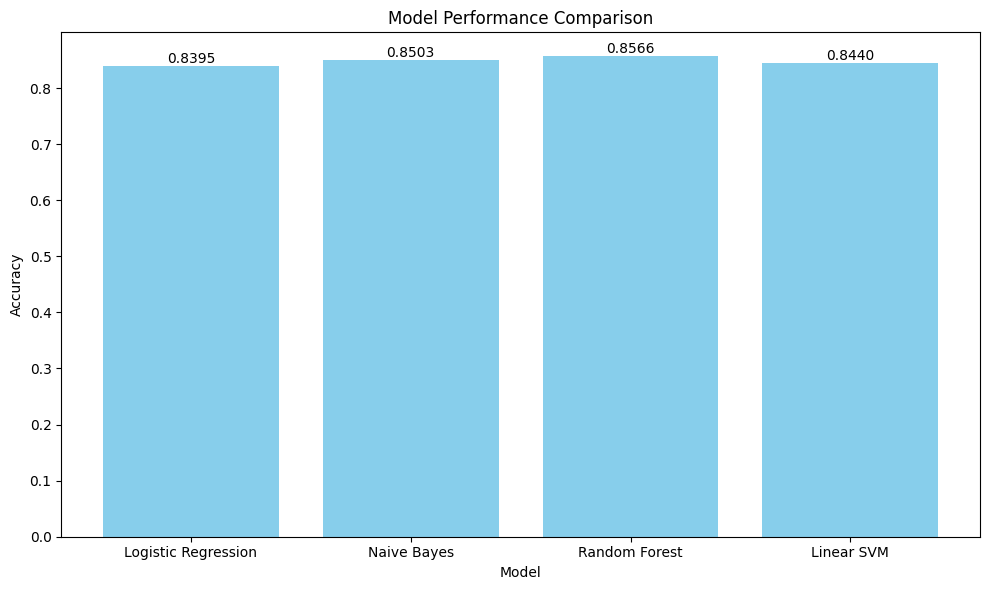

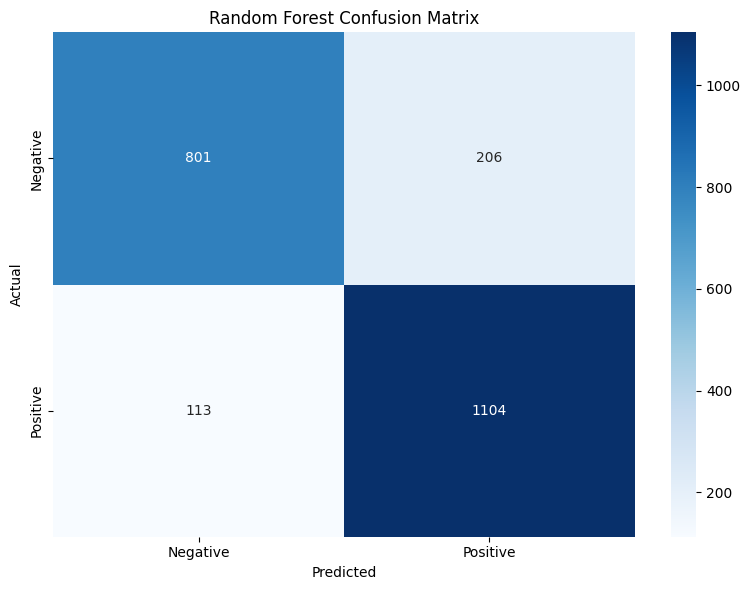

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Compare performance of all models
model_names = [result['Model'] for result in results]
accuracies = [result['Accuracy'] for result in results]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')

# Add accuracy values above bars
for bar, accuracy in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{accuracy:.4f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Visualize the confusion matrix of the best model
best_model_index = accuracies.index(max(accuracies))
best_model_name = model_names[best_model_index]
best_model_cm = results[best_model_index]['Confusion Matrix']

plt.figure(figsize=(8, 6))
sns.heatmap(best_model_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'{best_model_name} Confusion Matrix')
plt.tight_layout()
plt.show()


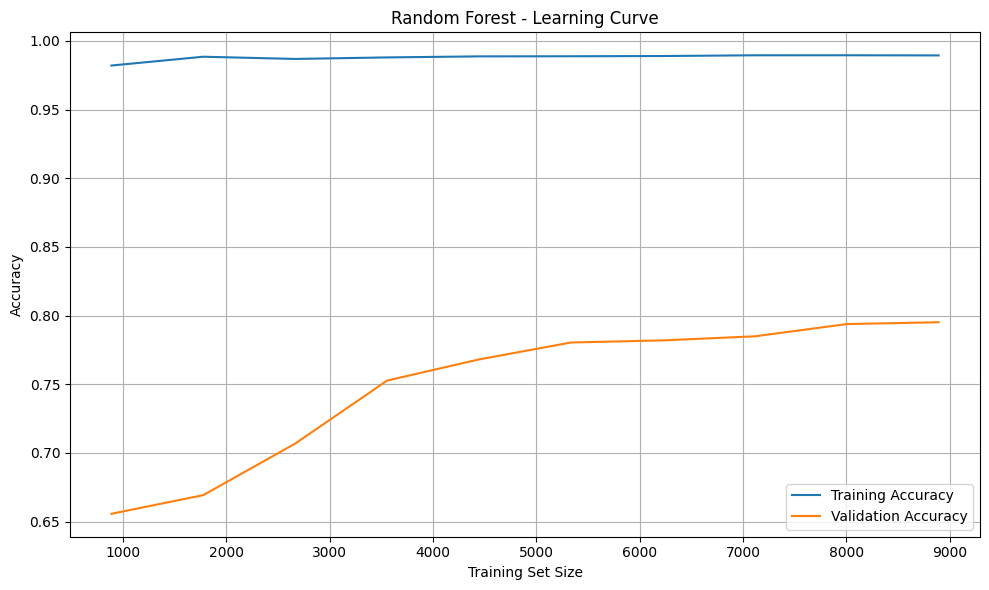

In [56]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, val_scores = learning_curve(
    estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    X=X, y=Y, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy',
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy')
plt.plot(train_sizes, val_mean, label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Random Forest - Learning Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Keras Deep Learning

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 1. Get the comments
comments = df["Clean_Comment"].astype(str).tolist()
sentiments = df["Sentiment"].tolist()

# 2. Encode labels (Positive:1, Negative:0)
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(sentiments)

# 3. Tokenizer and sequencing
vocab_size = 5000
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(comments)
sequences = tokenizer.texts_to_sequences(comments)

# 4. Padding
max_length = max([len(s) for s in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# 5. Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)

# 6. Build the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=16, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 7. Compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 8. Train
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


223/223 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5477 - loss: 0.6894 - val_accuracy: 0.5582 - val_loss: 0.6830
Epoch 2/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5577 - loss: 0.6795 - val_accuracy: 0.5857 - val_loss: 0.6738
Epoch 3/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6062 - loss: 0.6587 - val_accuracy: 0.6386 - val_loss: 0.6418
Epoch 4/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6795 - loss: 0.6204 - val_accuracy: 0.6504 - val_loss: 0.5982
Epoch 5/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7998 - loss: 0.5206 - val_accuracy: 0.7712 - val_loss: 0.4715
Epoch 6/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8601 - loss: 0.3999 - val_accuracy: 0.8409 - val_loss: 0.3859
Epoch 7/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8723 - loss: 0.3309 - val_accuracy: 0.8578 - val_loss: 0.3645
Epoch 8/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9023 - loss: 0.2775 - val_accuracy: 0.858

In [58]:
# Get accuracy score
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy:.4f}")


70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7860 - loss: 1.2491
Test Accuracy: 0.8004


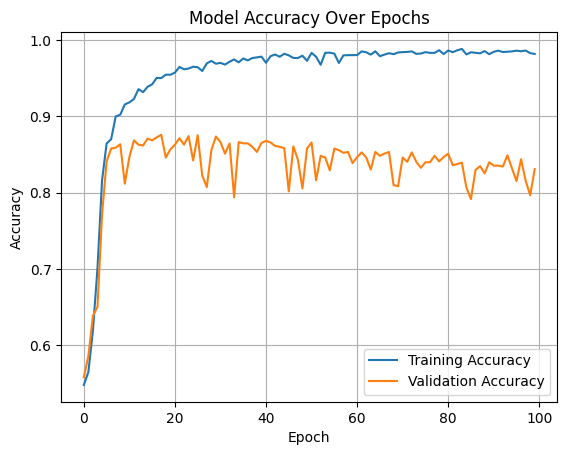

In [60]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
